<div align="left" style="font-weight: bold; font-family: Computer Modern; font-size: 24px; text-align: left; line-height: 1.5;">
    Federal University of Bahia (UFBA)
    <br>
    Department of Electrical and Computer Engineering
    <br>
    Course: ENGG67 - Introduction to Machine Learning
    <br>
    Professor: Antônio Fernandes
    <br>
    Students: Gabriel Correia and Márcio Barros
</div>


---

<h2 align="left" style="font-weight: bold; font-family: Computer Modern;font-size: 32px;text-align: left;">
    Evaluation 2 - Part 2: k-Nearest Neighbors (KNN) Algorithm
</h2>

The red wine quality dataset was chosen, which is also popular and found in the same database as the Iris flower dataset. It was already known that the dataset did not contain negative or inconsistent data, so only the removal of rows identified as outliers was performed.


<h2 align="left" style="font-weight: bold; font-family: Computer Modern;font-size: 22px;text-align: left;">
    2) Using a database suggested by you, tackle the regression problem using the k-NN algorithm.  
</h2> 


Results Obtained in the Program: 

Table of Downloaded Wine Data

Initial Table (First 5 and Last 5 values):


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0



Statistical Analysis of Each of the Data

Statistical Analysis of Parameters (Original):


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000



Correlation Matrix of the Downloaded Data (to check for dependency and independence relationships)


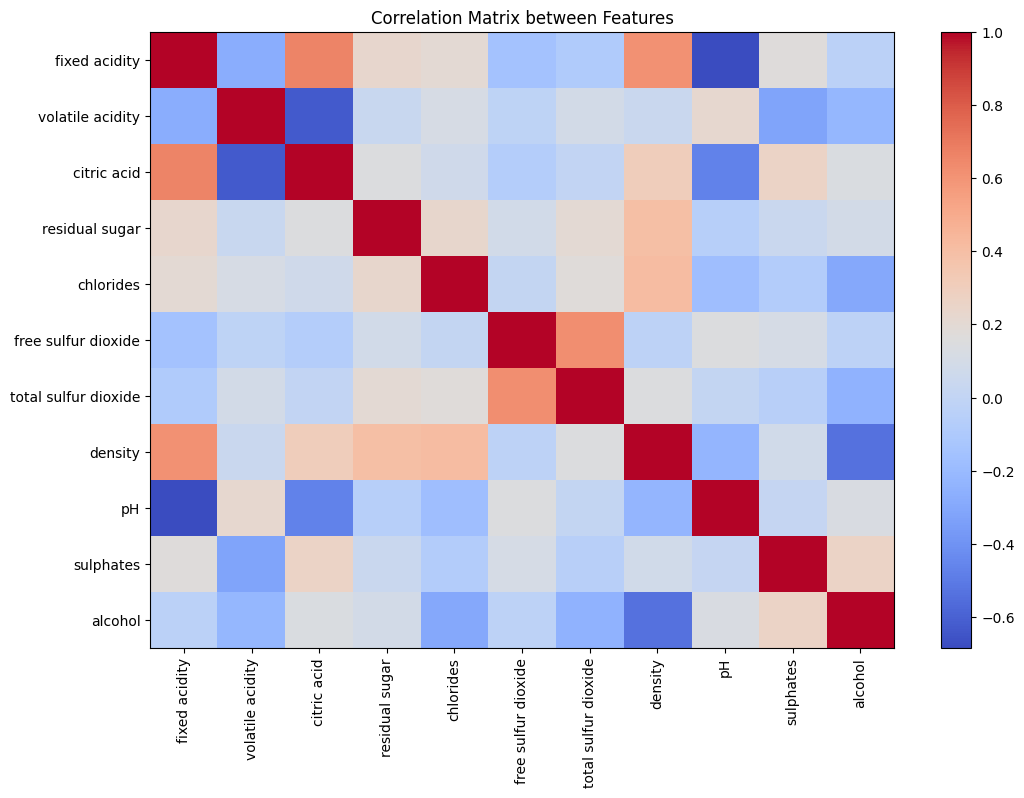


Analysis of the Scatter Plot of the First Two Parameters of the Applied PCA


C:\Users\GCorr\AppData\Local\Temp\ipykernel_10192\389999907.py:49: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outliers = pd.concat([outliers, df[(df[column] < lower_bound) | (df[column] > upper_bound)]])


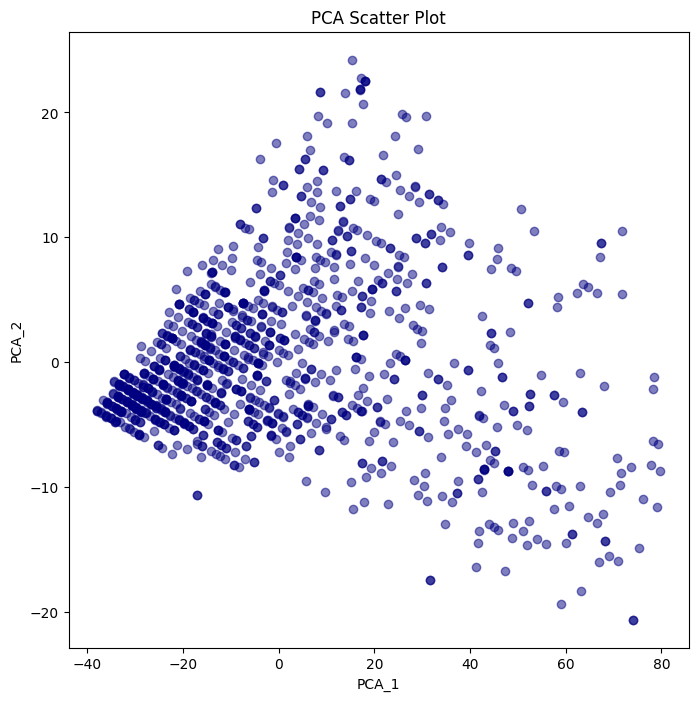


Comparative Analysis Between BoxPlots Without and With Outlier Removal


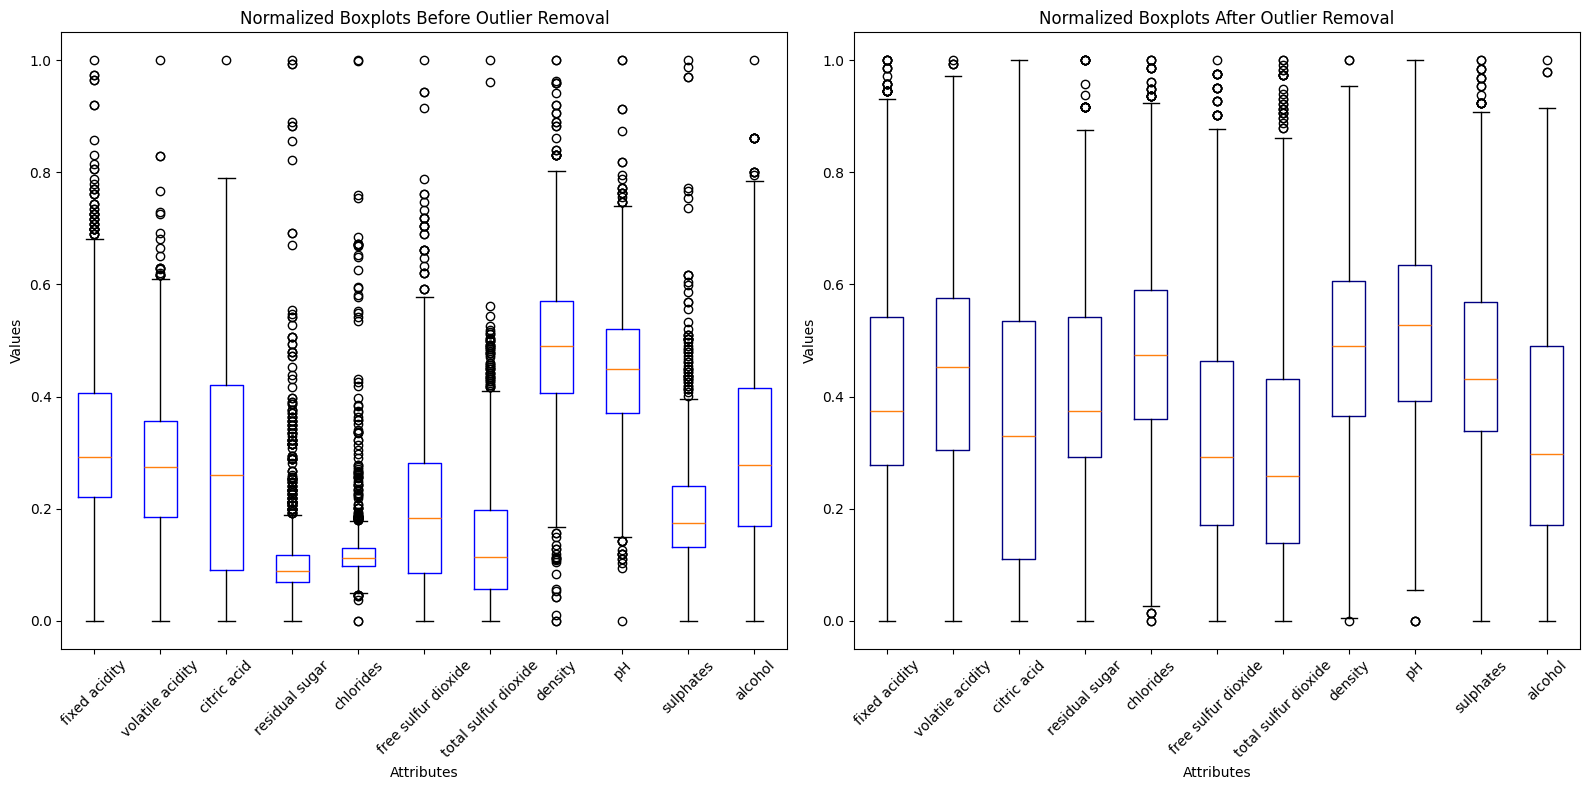


Analysis of the Accuracy of Each of the K Neighbors


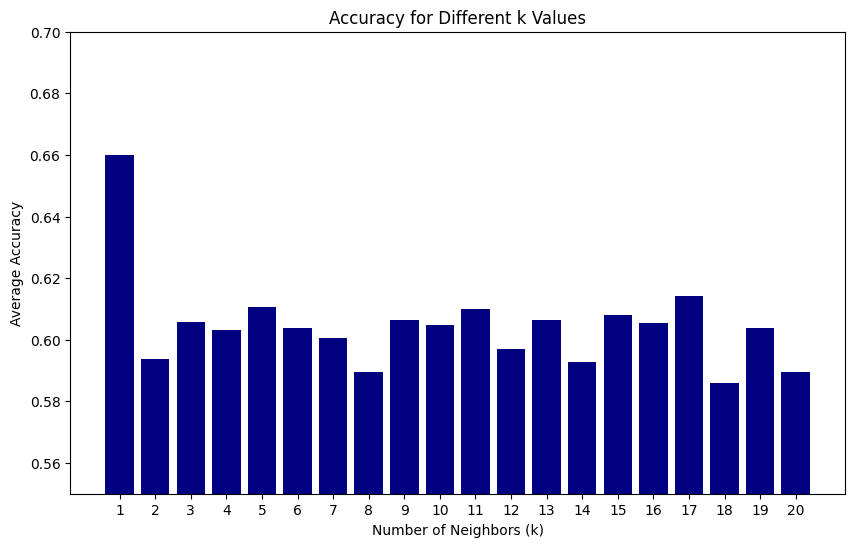


Comparative Analysis Between the KNN Algorithm (the objective of this work) and Decision Tree


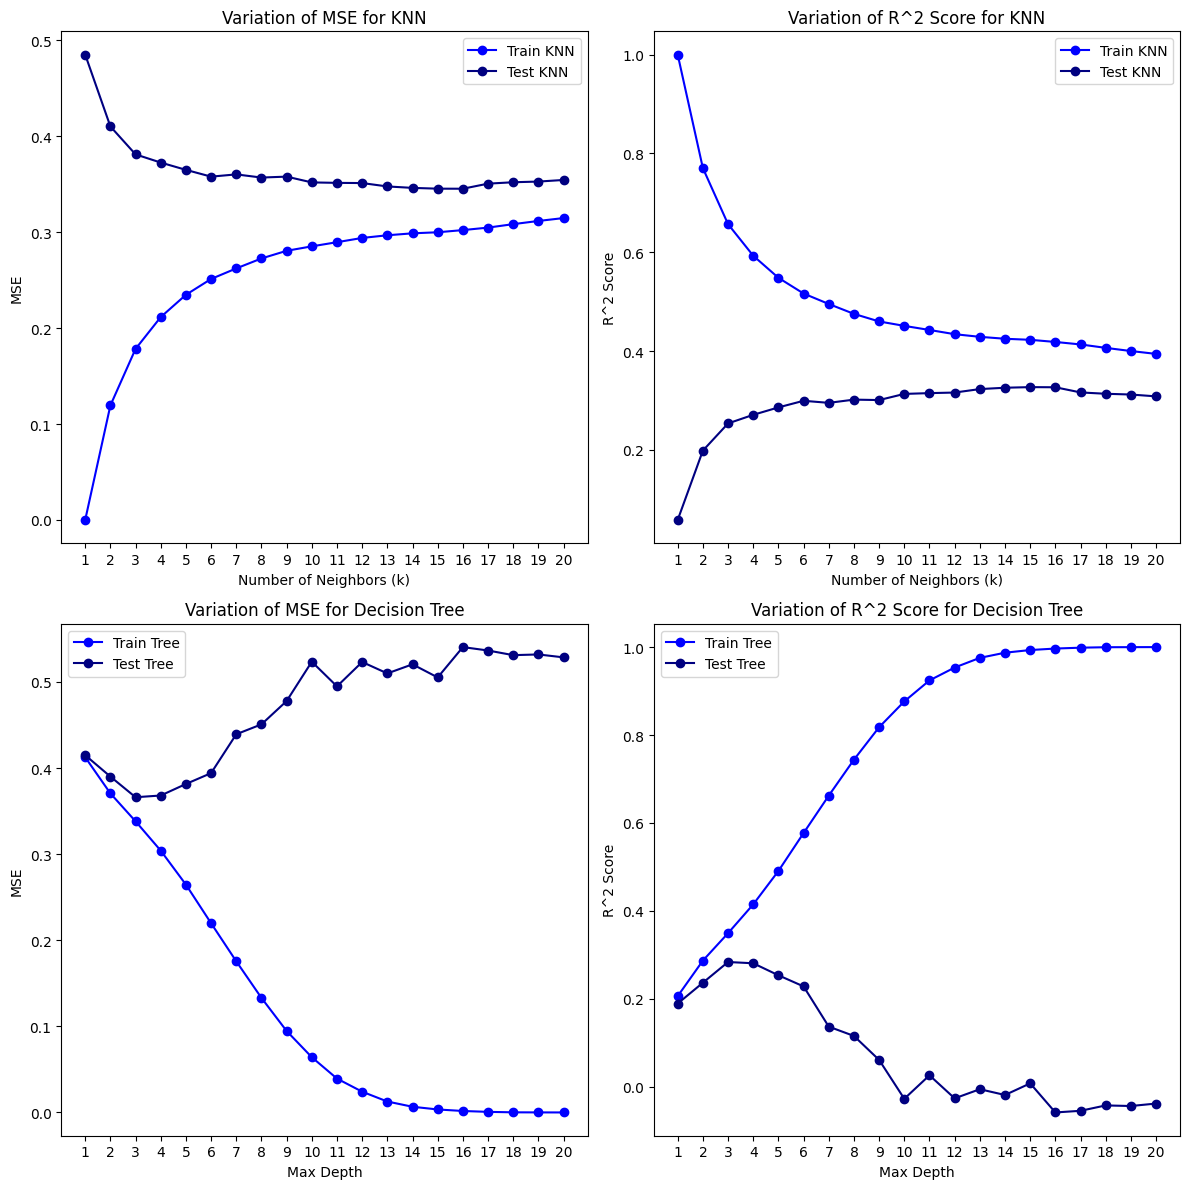

Best Hyperparameters: {'n_neighbors': 12}
Best Hyperparameters: {'max_depth': 3}
Best Hyperparameters: {'n_neighbors': 12}

MODEL RESULTS:
Best k value by accuracy: 1
Highest accuracy: 0.6610169491525424
MSE on Test: 0.2618585216572505
MSE on Train 0.297867326499352
R² Score on Test: 0.5117024165587845
R² Score on Train 0.42215280019934587

NUMERICAL PARAMETERS OBTAINED FROM THE kNN REGRESSION ALGORITHM:
Best k value from Regression: 12
Accuracy for the Best k value: 0.652542372881356
MSE on Train: 0.2558818269071682
MSE on Test: 0.36487462195480297
R² Score on Train: 0.507600137828171
R² Score on Test: 0.28804698290010894

Comparative Analysis of the Learning Curve for Test and Train


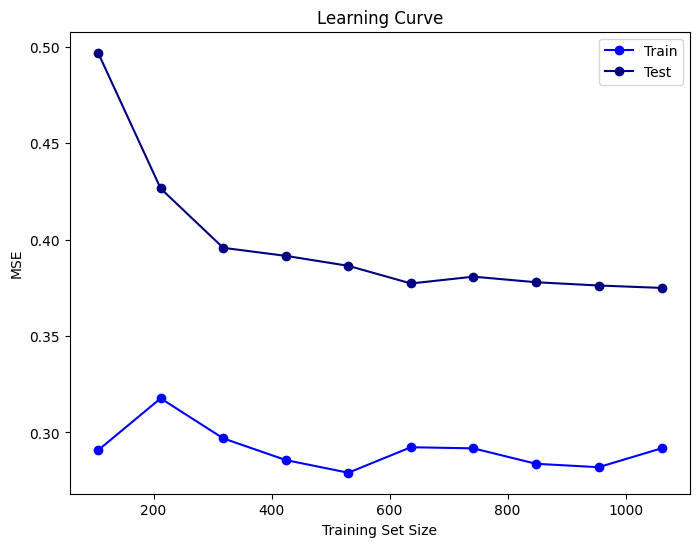

In [17]:
# Importing library
import ssl
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display

plt.close('all')
print('Results Obtained in the Program: ')

# Disable SSL certificate verification
ssl._create_default_https_context = ssl._create_unverified_context

def load_data(url):
    """Loads the dataset from the specified URL."""
    return pd.read_csv(url, delimiter=';')

def display_initial_table(df):
    """Displays the initial table with the first 5 and last 5 values."""
    print("\nInitial Table (First 5 and Last 5 values):")
    display(pd.concat([df.head(), pd.DataFrame(["..."] * (len(df) - 10)).set_index([0]), df.tail()]))

def explore_statistics(df):
    """Performs statistical analysis of the parameters."""
    print("\nStatistical Analysis of Parameters (Original):")
    display(df.describe().transpose())

def remove_outliers(df):
    """Identifies and removes outliers from the original DataFrame."""
    outliers = pd.DataFrame(columns=df.columns)
    for column in df.columns:
        if df[column].dtype != 'object':
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            outliers = pd.concat([outliers, df[(df[column] < lower_bound) | (df[column] > upper_bound)]])
    df_no_outliers = df.drop(outliers.index)
    return df_no_outliers

def apply_pca(df, num_components=5):
    """Applies PCA with the adjusted number of components."""
    pca = PCA(n_components=num_components)
    df_pca = pca.fit_transform(df.drop('quality', axis=1))
    df_pca = pd.DataFrame(df_pca, columns=[f'PCA_{i+1}' for i in range(df_pca.shape[1])])
    return df_pca

def display_pca_scatter_plot(df_pca):
    """Displays the PCA scatter plot."""
    plt.figure(figsize=(8, 8))
    plt.scatter(df_pca['PCA_1'], df_pca['PCA_2'], alpha=0.5, c='navy')
    plt.title('PCA Scatter Plot')
    plt.xlabel('PCA_1')
    plt.ylabel('PCA_2')
    plt.show()

def normalize_data(df, df_no_outliers):
    """Normalizes the data for easier visualization."""
    scaler = MinMaxScaler()
    df_normalized = pd.DataFrame(scaler.fit_transform(df.drop('quality', axis=1)), columns=df.columns[:-1])
    df_no_outliers_normalized = pd.DataFrame(scaler.fit_transform(df_no_outliers.drop('quality', axis=1)), columns=df_no_outliers.columns[:-1])
    return df_normalized, df_no_outliers_normalized

def display_boxplots(df_normalized, df_no_outliers_normalized):
    """Displays normalized boxplots before and after outlier removal."""
    plt.figure(figsize=(16, 8))

    # Before outlier removal
    plt.subplot(1, 2, 1)
    plt.boxplot(df_normalized.values, boxprops=dict(color='blue'))
    plt.title('Normalized Boxplots Before Outlier Removal')
    plt.xlabel('Attributes')
    plt.ylabel('Values')
    plt.xticks(range(1, len(df_normalized.columns) + 1), df_normalized.columns, rotation=45)

    # After outlier removal
    plt.subplot(1, 2, 2)
    plt.boxplot(df_no_outliers_normalized.values, boxprops=dict(color='navy'))
    plt.title('Normalized Boxplots After Outlier Removal')
    plt.xlabel('Attributes')
    plt.ylabel('Values')
    plt.xticks(range(1, len(df_no_outliers_normalized.columns) + 1), df_no_outliers_normalized.columns, rotation=45)

    plt.tight_layout()
    plt.show()

def handle_missing_values(df):
    """Handles missing values using KNN imputation."""
    X = df.drop('quality', axis=1)
    y = df['quality']
    knn_imputer = KNNImputer(n_neighbors=8)
    X_imputed = pd.DataFrame(knn_imputer.fit_transform(X), columns=X.columns)
    return X_imputed, y

def standardize_data(X_imputed):
    """Standardizes the data."""
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X_imputed.columns)
    return X_scaled

def train_and_evaluate_model(X_scaled, y, valores_k):
    """Trains and evaluates the KNN model for different k values."""
    mse_values_train = []
    mse_values_test = []
    r2_values_train = []
    r2_values_test = []

    # Cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    for k in valores_k:
        modelo_knn = KNeighborsRegressor(n_neighbors=k)
        
        mse_train = []
        mse_test = []
        r2_train = []
        r2_test = []

        for train_index, test_index in kf.split(X_scaled):
            X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            modelo_knn.fit(X_train, y_train)
            y_pred_train = modelo_knn.predict(X_train)
            y_pred_test = modelo_knn.predict(X_test)

            mse_train.append(mean_squared_error(y_train, y_pred_train))
            mse_test.append(mean_squared_error(y_test, y_pred_test))

            r2_train.append(r2_score(y_train, y_pred_train))
            r2_test.append(r2_score(y_test, y_pred_test))

        mse_values_train.append(np.mean(mse_train))
        mse_values_test.append(np.mean(mse_test))
        r2_values_train.append(np.mean(r2_train))
        r2_values_test.append(np.mean(r2_test))

    return mse_values_train, mse_values_test, r2_values_train, r2_values_test

def plot_performance_graphs(valores_k, mse_values_train, mse_values_test, r2_values_train, r2_values_test):
    """Displays performance graphs regarding the value of k."""
    # Values of max_depth for evaluation
    max_depth_values = list(range(1, 21))

    # Trains and evaluates the Decision Tree model for different max_depth values
    mse_values_train_tree, mse_values_test_tree, r2_values_train_tree, r2_values_test_tree = train_and_evaluate_decision_tree(X_scaled, y, max_depth_values)

    # Graphs for KNN and Decision Tree
    plt.figure(figsize=(12, 12))

    # Graphs for KNN
    # MSE for KNN
    plt.subplot(2, 2, 1)
    plt.plot(valores_k, mse_values_train, label='Train KNN', marker='o', color='blue')
    plt.plot(valores_k, mse_values_test, label='Test KNN', marker='o', color='navy')
    plt.title('Variation of MSE for KNN')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('MSE')
    plt.xticks(valores_k)
    plt.legend()

    # R^2 Score for KNN
    plt.subplot(2, 2, 2)
    plt.plot(valores_k, r2_values_train, label='Train KNN', marker='o', color='blue')
    plt.plot(valores_k, r2_values_test, label='Test KNN', marker='o', color='navy')
    plt.title('Variation of R^2 Score for KNN')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('R^2 Score')
    plt.xticks(valores_k)
    plt.legend()

    # Graphs for Decision Tree
    # MSE for Decision Tree
    plt.subplot(2, 2, 3)
    plt.plot(max_depth_values, mse_values_train_tree, label='Train Tree', marker='o', color='blue')
    plt.plot(max_depth_values, mse_values_test_tree, label='Test Tree', marker='o', color='navy')
    plt.title('Variation of MSE for Decision Tree')
    plt.xlabel('Max Depth')
    plt.ylabel('MSE')
    plt.xticks(max_depth_values)
    plt.legend()

    # R^2 Score for Decision Tree
    plt.subplot(2, 2, 4)
    plt.plot(max_depth_values, r2_values_train_tree, label='Train Tree', marker='o', color='blue')
    plt.plot(max_depth_values, r2_values_test_tree, label='Test Tree', marker='o', color='navy')
    plt.title('Variation of R^2 Score for Decision Tree')
    plt.xlabel('Max Depth')
    plt.ylabel('R^2 Score')
    plt.xticks(max_depth_values)
    plt.legend()

    plt.tight_layout()
    plt.show()

def plot_correlation_matrix(df):
    """Displays the correlation matrix between features."""
    plt.figure(figsize=(12, 8))
    correlation_matrix = df.corr()
    plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
    plt.colorbar()
    plt.title('Correlation Matrix between Features')
    plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
    plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
    plt.show()

def hyperparameter_tuning(X_train, y_train, model):
    """Performs hyperparameter tuning using GridSearchCV."""
    if model == 'knn':
        param_grid = {'n_neighbors': list(range(1, 21))}
        model_instance = KNeighborsRegressor()
    elif model == 'tree':
        param_grid = {'max_depth': list(range(1, 21))}
        model_instance = DecisionTreeRegressor(random_state=42)
    else:
        raise ValueError("Unsupported model. Choose between 'knn' and 'tree'.")

    grid_search = GridSearchCV(model_instance, param_grid, scoring='neg_mean_squared_error', cv=10)
    grid_search.fit(X_train, y_train)
    
    # Displays the best hyperparameters found
    print("Best Hyperparameters:", grid_search.best_params_)
    
    # Returns the model with the best hyperparameters
    return grid_search.best_estimator_

def plot_learning_curve(model, X, y):
    """Displays the learning curve."""
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=10, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, label='Train', marker='o', color='blue')
    plt.plot(train_sizes, test_scores_mean, label='Test', marker='o', color='navy')
    plt.title('Learning Curve')
    plt.xlabel('Training Set Size')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

def plot_accuracy_bars(valores_k, X_scaled, y, kf):
    """Plots the bar graph with accuracy for different k values."""
    accuracy_values = []

    for k in valores_k:
        modelo_knn = KNeighborsRegressor(n_neighbors=k)
        accuracy_k = []

        for train_index, test_index in kf.split(X_scaled):
            X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            modelo_knn.fit(X_train, y_train)
            y_pred_test = modelo_knn.predict(X_test)
            accuracy_k.append(accuracy_score(y_test, np.round(y_pred_test).astype(int)))

        accuracy_values.append(np.mean(accuracy_k))

    # Plotting the bar graph
    plt.figure(figsize=(10, 6))
    plt.bar(valores_k, accuracy_values, color='navy')
    plt.title('Accuracy for Different k Values')
    plt.xlabel('Number of Neighbors (k)')
    plt.xticks(valores_k)  # Ensures that only integer values are displayed on the X-axis
    plt.ylabel('Average Accuracy')
    plt.ylim(0.55, 0.7)  # Set Y-axis limits
    plt.show()

def train_and_evaluate_decision_tree(X_scaled, y, max_depth_values):
    """Trains and evaluates the Decision Tree model for different max_depth values."""
    mse_values_train = []
    mse_values_test = []
    r2_values_train = []
    r2_values_test = []

    # Cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    for max_depth in max_depth_values:
        modelo_tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        
        mse_train = []
        mse_test = []
        r2_train = []
        r2_test = []

        for train_index, test_index in kf.split(X_scaled):
            X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            modelo_tree.fit(X_train, y_train)
            y_pred_train = modelo_tree.predict(X_train)
            y_pred_test = modelo_tree.predict(X_test)

            mse_train.append(mean_squared_error(y_train, y_pred_train))
            mse_test.append(mean_squared_error(y_test, y_pred_test))

            r2_train.append(r2_score(y_train, y_pred_train))
            r2_test.append(r2_score(y_test, y_pred_test))

        mse_values_train.append(np.mean(mse_train))
        mse_values_test.append(np.mean(mse_test))
        r2_values_train.append(np.mean(r2_train))
        r2_values_test.append(np.mean(r2_test))

    return mse_values_train, mse_values_test, r2_values_train, r2_values_test


# Dataset URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

# Load the original data
df_wine = load_data(url)

# Display the initial table
print("\nTable of Downloaded Wine Data")
display_initial_table(df_wine)

# Perform statistical analysis of the parameters
print("\nStatistical Analysis of Each of the Data")
explore_statistics(df_wine)

# Display the correlation matrix
print("\nCorrelation Matrix of the Downloaded Data (to check for dependency and independence relationships)")
plot_correlation_matrix(X_imputed)

# Identify and remove outliers
df_wine_no_outliers = remove_outliers(df_wine)

# Apply PCA with adjusted number of components
df_wine_pca = apply_pca(df_wine_no_outliers, num_components=5)

# Display the PCA scatter plot
print("\nAnalysis of the Scatter Plot of the First Two Parameters of the Applied PCA")
display_pca_scatter_plot(df_wine_pca)

# Normalize the data for easier visualization
df_wine_normalized, df_wine_no_outliers_normalized = normalize_data(df_wine, df_wine_no_outliers)

# Display normalized boxplots before and after outlier removal
print("\nComparative Analysis Between BoxPlots Without and With Outlier Removal")
display_boxplots(df_wine_normalized, df_wine_no_outliers_normalized)

# Handle null values using KNN imputation
X_imputed, y = handle_missing_values(df_wine_no_outliers)

# Standardize the data
X_scaled = standardize_data(X_imputed)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
valores_k = list(range(1, 21))

# Display the bar chart of accuracy values of the K neighbors
print("\nAnalysis of the Accuracy of Each of the K Neighbors")
plot_accuracy_bars(valores_k, X_scaled, y, KFold(n_splits=10, shuffle=True, random_state=42))

# Train and evaluate the KNN model for different k values
mse_values_train, mse_values_test, r2_values_train, r2_values_test = train_and_evaluate_model(X_scaled, y, valores_k)

# Display performance graphs regarding the value of k
print("\nComparative Analysis Between the KNN Algorithm (the objective of this work) and Decision Tree")
plot_performance_graphs(valores_k, mse_values_train, mse_values_test, r2_values_train, r2_values_test)

# Hyperparameter tuning for KNN
best_model_knn = hyperparameter_tuning(X_train, y_train, model='knn')

# Hyperparameter tuning for Decision Tree
best_model_tree = hyperparameter_tuning(X_train, y_train, model='tree')

# Hyperparameter tuning for the Best Model
best_model = hyperparameter_tuning(X_train, y_train, model='knn')

# Train the best model with the complete training set
best_model.fit(X_scaled, y)

# Evaluate the best model on the test set
y_pred_test = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, np.round(y_pred_test).astype(int))

# Evaluate the best model on the test set for k = 12 - as indicated by the code
best_model_knn.n_neighbors = 12  # Set the model with the desired k value
best_model_knn.fit(X_train, y_train)
y_pred_test_k12 = best_model_knn.predict(X_test)
accuracy_test_k12 = accuracy_score(y_test, np.round(y_pred_test_k12).astype(int))

# Finding the k value with the highest accuracy
kf = KFold(n_splits=10, shuffle=True, random_state=42)  # Add this line
best_k_accuracy = valores_k[np.argmax(accuracy_test)]

# Display results of the General Model
print("\nMODEL RESULTS:")
print("Best k value by accuracy:", best_k_accuracy)
print("Highest accuracy:", accuracy_test)
print("MSE on Test:", mse_test)
print("MSE on Train", mse_train)
print("R² Score on Test:", r2_test)
print("R² Score on Train", r2_train)

# Display all numerical parameters obtained from the kNN Regression
print("\nNUMERICAL PARAMETERS OBTAINED FROM THE kNN REGRESSION ALGORITHM:")
print("Best k value from Regression:", best_model_knn.n_neighbors)
print("Accuracy for the Best k value:", accuracy_test_k12)
print("MSE on Train:", np.mean(mse_values_train))
print("MSE on Test:", np.mean(mse_values_test))
print("R² Score on Train:", np.mean(r2_values_train))
print("R² Score on Test:", np.mean(r2_values_test))

# Using the plot_learning_curve function to display the learning curve
print("\nComparative Analysis of the Learning Curve for Test and Train")
plot_learning_curve(best_model, X_scaled, y)



CONSIDERATIONS:

The presented code addresses the regression problem using the k-NN (k-Nearest Neighbors) algorithm for a specific red wine dataset. The code performs several steps, including data loading, exploratory analysis, preprocessing (removal of outliers, PCA application, normalization, etc.), training the k-NN model for different values of k, hyperparameter tuning, applying the DecisionTree algorithm as a comparison to k-NN, and evaluating the performance of the focal model in practice.

This code covers everything from data loading to detailed model performance evaluation, going through various preprocessing and analysis steps.


---
